# Capstone Project

##  Traffic Violations

## Dataset is Open Parking and Camera Violations
Source: NYC OpenDATA issued by City of New York.
https://data.cityofnewyork.us/City-Government/Open-Parking-and-Camera-Violations/nc67-uf89/data

The dataset is hosted by NYC OpenData and created on Jan 4th, 2016 and updated everyday. It was made public on 01/11/2016. The dataset used here was last updated on Dec 19, 2018. This dataset contains Open Parking and Camera Violations issued by the City of New York. The Agency that issued the dataset is Department of Finance (DOF).

It has 1048575 Rows and 16 Columns.

In [1]:
#importing libraries for analysing data
import pandas as pd
import numpy as np
import datetime
import calendar
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset into a dataframe
df1=pd.read_csv("Open_Parking_and_Camera_Violations.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
Plate               1048532 non-null object
State               1048575 non-null object
License Type        1048575 non-null object
Issue Date          1048575 non-null object
Violation Time      1045001 non-null object
Violation           1044978 non-null object
Fine Amount         1045028 non-null float64
Penalty Amount      1045028 non-null float64
Interest Amount     1045028 non-null float64
Reduction Amount    1045028 non-null float64
Payment Amount      1045028 non-null float64
Amount Due          1045028 non-null float64
Precinct            1045028 non-null float64
County              1032704 non-null object
Issuing Agency      1045012 non-null object
Violation Status    254512 non-null object
dtypes: float64(7), object(9)
memory usage: 128.0+ MB


## Question 1: Does the time of the day or month of year or Day of the week have any effect on Violations?

##                                                      OR
                                               
  ## Are more violations happening in the rush hours of the day?

### Step 1: Clean the data of NaNs

In [4]:
df1.isnull().sum()

Plate                   43
State                    0
License Type             0
Issue Date               0
Violation Time        3574
Violation             3597
Fine Amount           3547
Penalty Amount        3547
Interest Amount       3547
Reduction Amount      3547
Payment Amount        3547
Amount Due            3547
Precinct              3547
County               15871
Issuing Agency        3563
Violation Status    794063
dtype: int64

In [5]:
# Converting the column name to not have spaces in between (to avoid syntax error when using without quotes)
df1.rename(columns={'Violation Time':'Violation_Time'}, inplace=True)

There are 3574 not null or NaN values in Violation_Time. Need to remove the records with NaN. to copy only records with non-null values to dataframe.

In [6]:
df1=df1[df1.Violation_Time.notnull()]
df1.isnull().sum()

Plate                   42
State                    0
License Type             0
Issue Date               0
Violation_Time           0
Violation               28
Fine Amount              0
Penalty Amount           0
Interest Amount          0
Reduction Amount         0
Payment Amount           0
Amount Due               0
Precinct                 0
County               12299
Issuing Agency           0
Violation Status    790501
dtype: int64

### Step 2: Formating the 'Violation_Time' column to 24-hour date format for efficient date extractions and readability

In [7]:
# converting the values to correct format of hh:mm AM/PM instead of hh:mm A/P and dropping the
# records which doesnt have A or P.
list_time=[]
list_time=df1.Violation_Time.tolist()
new_list_time=[]
for value in list_time:
    if value.find('P') > -1:
        new_list_time.append(value.replace('P', ' PM'))
    elif value.find('A') > -1:
        new_list_time.append(value.replace('A', ' AM'))
    else:
        df1.drop(df1[(df1['Violation_Time'] == value)].index, inplace=True)
df1.reset_index(drop=True, inplace=True)           
df1['Violation_Time']=pd.DataFrame(new_list_time)

In [8]:
# Some of the Violation_Time values have '00:xx' in the fields. Converting the '00:xx' to '12:xx'
list_time=df1.Violation_Time.tolist()
new_list_time=[]
for value in list_time:    
    if value[0:2]=='00':
        new_list_time.append(value.replace('00', '12'))
    else:
        new_list_time.append(value)
df1.reset_index(drop=True, inplace=True) 
df1['Violation_Time']=pd.DataFrame(new_list_time)

Some typos in data entry exists...Need to correct or remove them.
11:00  PMM,   :   PM ,   06:3. AM,   :   PM and many more...which are called ValueErrors.

In [9]:
# Now getting to convert the strings in Violation_Time into datetime64 format with 24 hour format
# This process also takes care of the ValueErrors cited above by deleting those records.
Time_list=df1.Violation_Time.tolist()
new_time_list=[]
for value in Time_list:
    try:
        new_time_list.append(datetime.datetime.strptime(value, '%I:%M %p').time().strftime('%H:%M'))
    except ValueError:
        new_time_list.append(np.nan)

df1["Violation_Time"]=pd.DataFrame(new_time_list)
df1=df1[df1.Violation_Time.notnull()]
df1.reset_index(drop=True, inplace=True)

In [10]:
# Extracting the hour from the time
#df1['Issue_Date_formatted']=pd.to_datetime(df1['Issue_Date_formatted'])
df1['Violation_Time']=pd.to_datetime(df1['Violation_Time'])
df1['Violation_Time_inhours']=df1['Violation_Time'].dt.hour

In [11]:
# Years from Date field are abonormally greater than last update date...any year after update year 
# needs to be dropped.
# The month and date are greater than 12 and 31 respecitively...so need to drop these records.
# and numerous other value errors.

df2=pd.read_csv("Open_Parking_and_Camera_Violations.csv")

df2.rename(columns={'Issue Date':'Issue_Date'}, inplace=True)
df2=df2[df2.Issue_Date.notnull()]
date_list=df2.Issue_Date.tolist()
new_date_list=[]
for value in date_list:
    try:
        new_date_list.append(datetime.datetime.strptime(value, '%m/%d/%Y').date().strftime('%m/%d/%Y'))
    except ValueError:
        new_date_list.append(np.nan)

df2["Issue_Date"]=pd.DataFrame(new_date_list)
df2=df2[df2.Issue_Date.notnull()]
df2.reset_index(drop=True, inplace=True)

In [12]:
# Converting to datetime64 format
df2['Issue_Date']=pd.to_datetime(df2['Issue_Date'])
#  Extracting day of the week from the date and creating a new column
df2['Issue_date_dayofweek']=df2['Issue_Date'].dt.weekday_name
#  Extracting month of the year from the date and creating a new column
df2['Issue_date_month']=df2['Issue_Date'].dt.month
df2.reset_index(drop=True, inplace=True)

In [13]:
# Dropping records which have date later than the last updated date.
df2.drop(df2[(df2['Issue_Date'] > pd.to_datetime('12/19/2018'))].index, inplace=True)

### Step 3: Now plotting the desired analysis in Matplotlib using bar charts

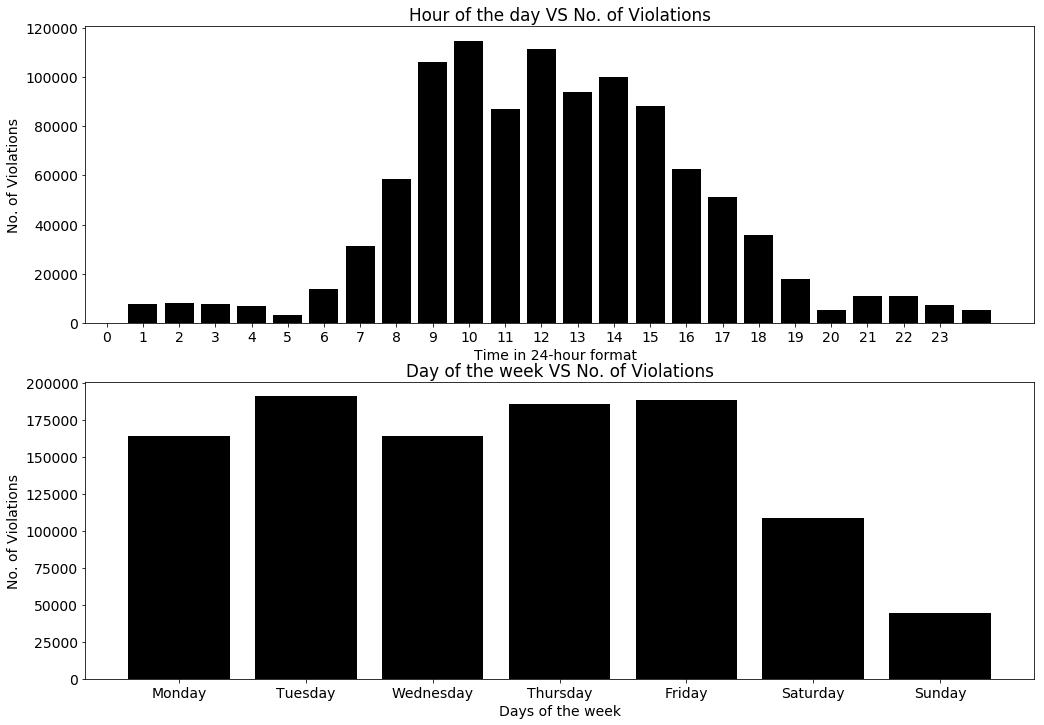

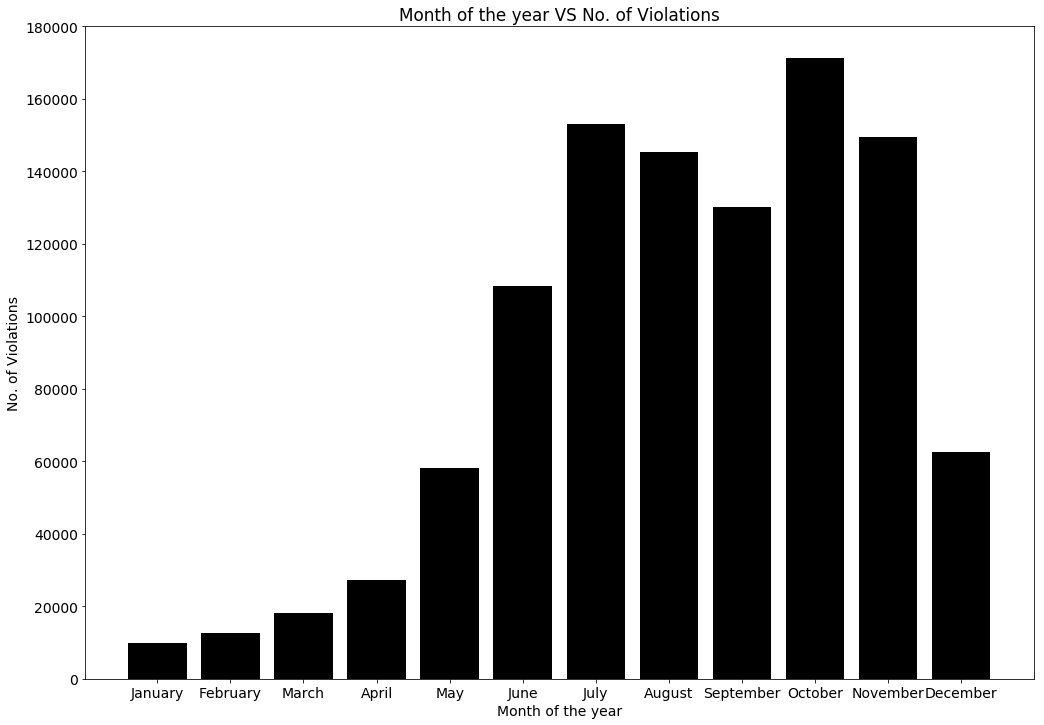

In [14]:
# Now plotting the desired analysis
plt.figure (figsize=(17,12))
plt.rcParams.update({'font.size': 14})

plt.subplot(2,1,1)

plt.bar(np.arange(1,25), df1.Violation_Time_inhours.value_counts().sort_index(), color='black' )
plt.xticks(df1.Violation_Time_inhours.unique() )
plt.xlabel("Time in 24-hour format  ")
plt.ylabel("No. of Violations")
plt.title("Hour of the day VS No. of Violations")


plt.subplot(2,1,2)
D=df2.Issue_date_dayofweek.value_counts().to_dict()
plt.bar(np.arange(1, 8), [D[value] for value in list(calendar.day_name)], color='black')
plt.xticks(np.arange(1, 8), list(calendar.day_name))
plt.xlabel("Days of the week")
plt.ylabel("No. of Violations")
plt.title("Day of the week VS No. of Violations")


plt.figure (figsize=(17,12))
x=list(calendar.month_name)
x.pop(0)
plt.bar(np.arange(1, 13), df2.Issue_date_month.value_counts().sort_index(), color='black')
plt.xticks(np.arange(1, 13), x )
plt.xlabel("Month of the year")
plt.ylabel("No. of Violations")
plt.title("Month of the year VS No. of Violations")

plt.show()

## Question 2: How far are the Viotions given by the Law enforcement officer really lawful from the cases that came to the court?

##       a) Say, If you are given a ticket or Violation, what is the probabiltiy that you will be not be guilty if appealed to court?

##        b) How far are the amount of fees charged by Officer really correct from the cases that came to the court ?

### To Answer this question

### Step 1: We need to identify how many cases came to the court and hearing has been held. 

In [15]:
df3=pd.read_csv("Open_Parking_and_Camera_Violations.csv")

In [16]:
df3.head()

,Plate,State,License Type,Issue Date,Violation Time,Violation,Fine Amount,Penalty Amount,Interest Amount,Reduction Amount,Payment Amount,Amount Due,Precinct,County,Issuing Agency,Violation Status
0,AH66926,AZ,PAS,8/24/2018,02:45P,NO STANDING-EXC. AUTH. VEHICLE,95.0,0.0,0.00,0.0,95.0,0.00,20.0,NY,TRAFFIC,NaN
1,GCF8736,NY,PAS,8/24/2018,03:53P,NO STANDING-EXC. TRUCK LOADING,95.0,0.0,0.00,0.0,95.0,0.00,20.0,NY,TRAFFIC,NaN
2,8BE0823,MD,PAS,11/8/2014,03:46P,NO STANDING-COMM METER ZONE,115.0,60.0,59.25,0.0,0.0,234.25,14.0,NY,POLICE DEPARTMENT,NaN
3,GRD6399,NY,OMS,1/10/2015,04:50P,NO STANDING-COMM METER ZONE,115.0,60.0,56.19,0.0,0.0,231.19,14.0,NY,POLICE DEPARTMENT,NaN
4,JLW8105,PA,PAS,8/18/2015,02:30P,NO STANDING-COMM METER ZONE,115.0,60.0,47.19,0.0,0.0,222.19,14.0,NaN,POLICE DEPARTMENT,NaN


In [17]:
# Renaming the column names to avoid syntax errors with a space inbetween
df3.rename(columns={'Violation Status':'Violation_Status'}, inplace=True)

In [18]:
df3.Violation_Status.unique()

array([nan, 'HEARING HELD-NOT GUILTY', 'HEARING HELD-GUILTY',
       'APPEAL REVERSED', 'HEARING HELD-GUILTY REDUCTION',
       'HEARING ADJOURNMENT', 'HEARING PENDING', 'APPEAL AFFIRMED',
       'APPEAL ABANDONED', 'ADMIN CLAIM GRANTED', 'ADMIN REDUCTION',
       'ADMIN CLAIM DENIED', 'HEARING HELD-REINSTATEMENT',
       'APPEAL MODIFIED', 'APPEAL REMANDED'], dtype=object)

In [19]:
df3['Violation_Status'].value_counts().head()

HEARING HELD-GUILTY              100786
HEARING HELD-GUILTY REDUCTION     64950
HEARING HELD-NOT GUILTY           61565
HEARING PENDING                   19012
HEARING ADJOURNMENT                3158
Name: Violation_Status, dtype: int64

Therefore, Cases that came to court are the ones where Hearing is held i.e. the first three above.. 100786 + 64950 +61565 = 227301.

### Step 2: We need to calculate how many are not guilty which will give a percentage of Violations that are not really lawful or incorrectly charged.

Of these number of cases that came to court, 100786 are "guilty" or lawful. i.e 100786/227301 = 44% 

In other words the if you are given a ticket or Violation, the probabiltiy that you will be not be guilty if appealed to court is 56% (100-44%) or 0.56 chance of not being guilty.

## b) How far are the amount of fees charged by Officer correctly charged based on the cases that were charged a fine amount for the violation ?

To answer this question, we need to find the percentage of cases where the reduction of fees is zero out of the cases where there was a charge.

### Step 1: Find the number of non-null cases where there is a charge or the Fine amount is greater than 0

In [20]:
df3.rename(columns={'Fine Amount':'Fine_Amount'}, inplace=True)
df3.rename(columns={'Reduction Amount':'Reduction_Amount'}, inplace=True)
df3=df3[df3.Fine_Amount.notnull()]

In [21]:
FA=df3[df3['Fine_Amount'] > 0]
len(FA) #1045012

1045012

### Step 2: From those cases find the number of cases where the charge was correct i.e where the reduction amount was zero.

In [22]:
FA[FA['Reduction_Amount'] == 0].Reduction_Amount.value_counts() #864350 is charge correct
FA[FA['Reduction_Amount'] > 0].Reduction_Amount.value_counts().sum() #180662 is charge incorrect

180662

There fore, out of 1045012 cases where there is a charge, 864350 cases the charge was reduced.
i.e . 82.7% of the time the charges levied are appropriate.

## Question 3:  Which county has the highest number of Violations and does the number of Violations correlate with the population/Number of vehicles in those counties ?

### To answer this question need to find the number of Violations according to the County.
#### The numbers then need to be normalized to the total number of vehicles  in each county of NY. However, it was hard to find that data in public datasets. Closest data I found was Population and Area of each county.

In [23]:
df4=pd.read_csv("Open_Parking_and_Camera_Violations.csv")

In [40]:
# Abbreviations from Wikipedia
D_abbr={'BX':'Bronx', 'NY':'New York', 'Q':'Queens', 'K':'Kings', 'R':'Richmond',
        'BK':'Broome', 'QN':'Unknown ', 'MN':'Monroe', 'ST':'St.Lawrence' }
# 2010 Populations from Wikipedia
D_popul={'BX':1385108, 'NY':1585873, 'Q':2230722, 'K':2504700, 'R':468730,
        'BK':200600, 'QN': 0, 'MN':744344, 'ST':111944 }
# Area in Sq.miles from Wikipedia
D_area={'BX':57.43, 'NY':33.77, 'Q':178.28, 'K':96.9, 'R':102.5,
        'BK':715, 'QN':' ', 'MN':1366, 'ST':2821 }
# Wikipedia source: https://en.wikipedia.org/wiki/List_of_counties_in_New_York_(state) 

In [46]:
# County-wise Violations
# To lable the counties in full expanded form wrote the following code takeing the abbreviations data from the dictionary
# created above.
county_series=df4.County.value_counts()
new_list1=[]
for value in county_series.index:
    new_list1.append(D_abbr[value])
county_series.index=new_list1
county_series

New York       130355
Queens          47702
Kings           47350
Bronx           22705
Richmond         2710
Broome           1250
Unknown           902
Monroe            266
St.Lawrence       122
Name: County, dtype: int64

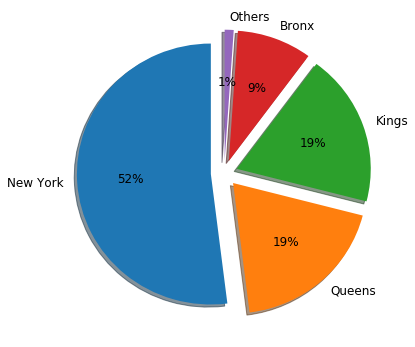

In [48]:
# Depiction of the above data as a pie chart
plt.figure(figsize=(6,6))

plt.pie (county_series.head(), labels=['New York','Queens','Kings','Bronx','Others'],  explode= (.1,.1,.1,.1,.1),
         shadow=True, startangle=90, autopct='%1.0f%%')
plt.show()

In [27]:
popul=pd.DataFrame.from_dict(D_popul, orient='index', columns=['Population'])
area=pd.DataFrame.from_dict(D_popul, orient='index', columns=['Area'])

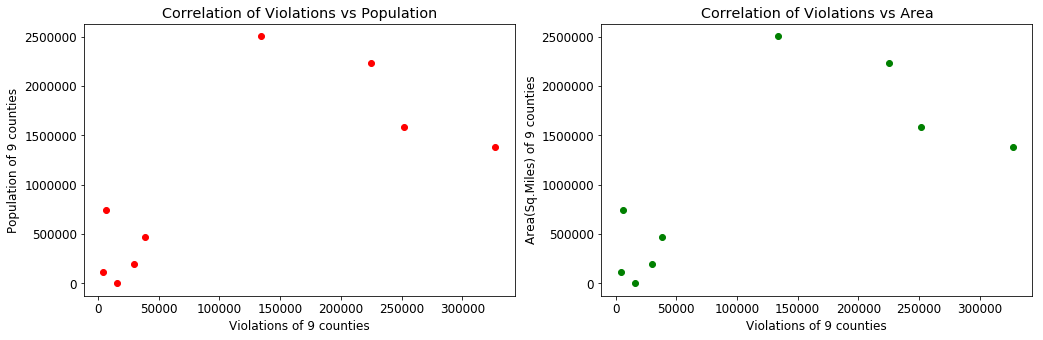

In [28]:
plt.figure(figsize=(17,5))
plt.rcParams.update({'font.size': 12})

plt.subplot(1,2,1)
plt.scatter(x=county_series, y=popul, color='red')
plt.xlabel('Violations of 9 counties')
plt.ylabel('Population of 9 counties')
plt.title('Correlation of Violations vs Population')

plt.subplot(1,2,2)
plt.scatter(x=county_series, y=area, color='green')
plt.xlabel('Violations of 9 counties')
plt.ylabel('Area(Sq.Miles) of 9 counties')
plt.title('Correlation of Violations vs Area')
plt.show()

If there is correlation between x and y there should a linear line formation. There appears to be no correlation between Violation counts from the 9 counties and Population or Area. Therefore, Violations is not dependant on the population or area of this State NY.

Since more than 50% of the Violations are happening in the NewYork county it can recommended to the NYPD to add more resources to check the violations.

Justed wanted to check if population and area of these counties are correlated plotted them versus each other.

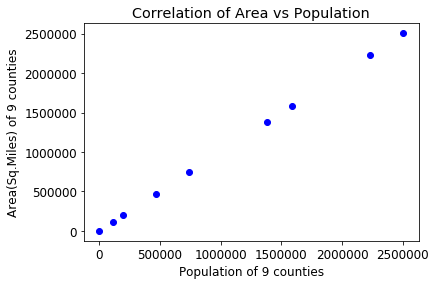

In [29]:
# Correlation between Population and area of 9 counties in NY state.
plt.scatter(x=popul, y=area, color='blue')
plt.xlabel('Population of 9 counties')
plt.ylabel('Area(Sq.Miles) of 9 counties')
plt.title('Correlation of Area vs Population')
plt.show()

The population and area are positively correlated here for the 9 counties in NY state.

## Question 4: Of all the cases appealed to the court, what is the category of violations


##        a) that have appealed to the court, the highest ?

##        b) that have the highest cases of not guilty?

### a) To answer this question 

### First, we need to find the Violation cases that have appealed to the court

 This we can do by simply considering the non-null records of Violation Status which indicates that a hearing is held i.e 'HEARING HELD'

In [30]:
df4.rename(columns={'Violation Status':'Violation_Status'}, inplace=True)
df4.Violation_Status.unique()

array([nan, 'HEARING HELD-NOT GUILTY', 'HEARING HELD-GUILTY',
       'APPEAL REVERSED', 'HEARING HELD-GUILTY REDUCTION',
       'HEARING ADJOURNMENT', 'HEARING PENDING', 'APPEAL AFFIRMED',
       'APPEAL ABANDONED', 'ADMIN CLAIM GRANTED', 'ADMIN REDUCTION',
       'ADMIN CLAIM DENIED', 'HEARING HELD-REINSTATEMENT',
       'APPEAL MODIFIED', 'APPEAL REMANDED'], dtype=object)

In [31]:
df4=df4[df4.Violation_Status.notnull()]
group=df4[(df4['Violation_Status']=='HEARING HELD-NOT GUILTY') | (df4['Violation_Status']== 'HEARING HELD-GUILTY')
    |  (df4['Violation_Status']== 'HEARING HELD-GUILTY REDUCTION')]

### Second, we need to check the categories of Violations and see from the cases that appealed is there any category which has the highest number of appeals.

In [32]:
group.Violation.value_counts().head()

NO STANDING-DAY/TIME LIMITS       34477
FAIL TO DSPLY MUNI METER RECPT    32815
NO PARKING-STREET CLEANING        16356
DOUBLE PARKING                    14850
NO PARKING-DAY/TIME LIMITS        13290
Name: Violation, dtype: int64

'NO STANDING-DAY/TIME LIMITS'  is the cateogory which has the highest number of appeals to the court.

## b) What is the category of  violations that have the highest cases of not guilty?

### To answer this question 


### We need to take all the cases of not guilty and see which category is highest.

In [33]:
df4[df4.Violation_Status == 'HEARING HELD-NOT GUILTY'].Violation.value_counts().head()

FAIL TO DSPLY MUNI METER RECPT    14453
DOUBLE PARKING                     7828
NO PARKING-DAY/TIME LIMITS         6165
NO STANDING-DAY/TIME LIMITS        5026
NO PARKING-STREET CLEANING         4023
Name: Violation, dtype: int64

In [34]:
df4[df4.Violation_Status == 'HEARING HELD-GUILTY'].Violation.value_counts().head()

NO STANDING-DAY/TIME LIMITS       12764
NO PARKING-STREET CLEANING        11790
FAIL TO DSPLY MUNI METER RECPT     8094
INSP. STICKER-EXPIRED/MISSING      7838
FIRE HYDRANT                       7629
Name: Violation, dtype: int64

There fore, looking at the above result, we can conclude that the "FAIL TO DSPLY MUNI METER RECPT" category has the highest number of 'not guilty' cases i.e. 14453.

Also, the number of guilty cases in the same category are 8094. i.e out of a total of 22547 cases where hearing was held for this category 14453 cases were 'not guilty' i.e a 64% of cases are not guitly.

This shows that charging people with this Violation there is a lot of ambiguity and the law enforcement officers need to be more judicious when booking the charge.

## RESEARCH PROPOSAL

When a person is  ticketted and he feels he is not guilty, then it will be highly benfeficial for a person to know his chances of getting proven not guilty before deciding to appeal to the court.

To answer this question,  first one needs to calculate what are the chances of guilty or not guilty for all the major categories, based on the past/existing data.

Then, using a prediction model, one needs to train the model using the existing data and then predict the chances of not guilty based on a cateogory.